In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_bank = pd.read_csv('results/bank_marketing_all_features_nums.csv')
df_breast = pd.read_csv('results/breast_cancer_wisconsin_all_features_nums.csv')
df_student = pd.read_csv('results/student_performance_all_features_nums.csv')
df_wine = pd.read_csv('results/wine_all_features_nums.csv')
df_wine_quality = pd.read_csv('results/wine_quality_all_features_nums.csv')

In [3]:
dfs = [df_bank, df_breast, df_student, df_wine, df_wine_quality]

In [4]:
# df_student = pd.read_csv('results/student_performance_all_features_nums.csv')
# dfs = [df_student]
# df_student_f = pd.read_csv('results/features/student_performance.csv')
# dfs_f = [df_student_f]

In [5]:
df_bank_f = pd.read_csv('results/features/bank_marketing.csv')
df_breast_f = pd.read_csv('results/features/breast_cancer_wisconsin.csv')
df_student_f = pd.read_csv('results/features/student_performance.csv')
df_wine_f = pd.read_csv('results/features/wine.csv')
df_wine_quality_f = pd.read_csv('results/features/wine_quality.csv')

In [6]:
dfs_f = [df_bank_f, df_breast_f, df_student_f, df_wine_f, df_wine_quality_f]

In [ ]:
# i=0
# len(eval(dfs_f[i].loc[dfs_f[i].Method == 'CMIM', ['Selected Features']].values[0][0]))

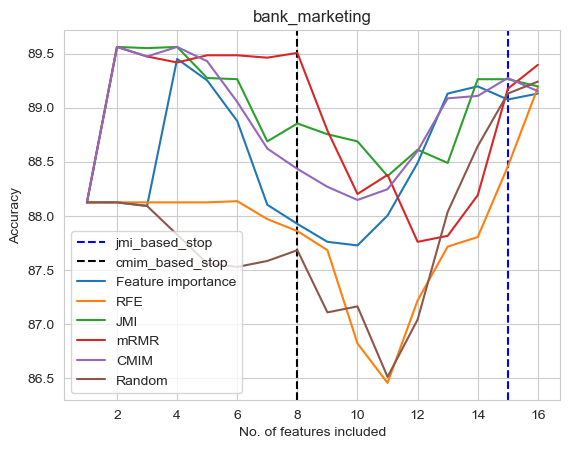

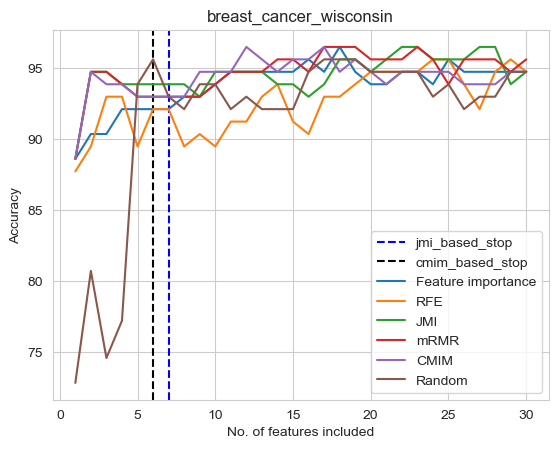

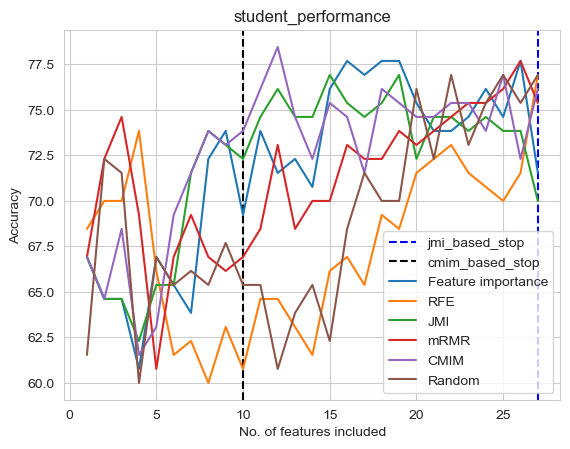

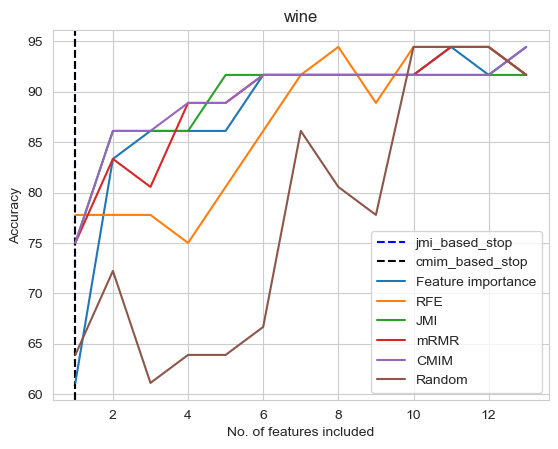

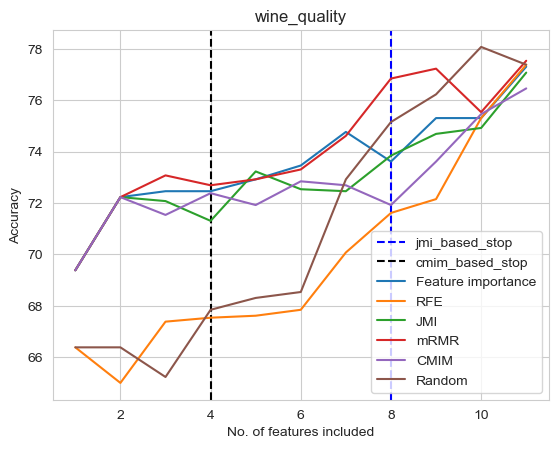

In [25]:
i=0

summary = []
names = ['bank_marketing', 'breast_cancer_wisconsin', 'student_performance', 'wine', 'wine_quality']

for df in dfs:
    plt.figure()

    jmi_num = len(eval(dfs_f[i].loc[dfs_f[i].Method == 'JMI', ['Selected Features']].values[0][0]))
    plt.axvline(jmi_num, label='jmi_based_stop', linestyle='--', c = 'b')

    cmim_num = len(eval(dfs_f[i].loc[dfs_f[i].Method == 'CMIM', ['Selected Features']].values[0][0]))
    plt.axvline(cmim_num, label='cmim_based_stop', linestyle='--', c = 'k')

    for method in df.Method.unique():
        df_single_method = df[df.Method == method]
        plt.plot(df_single_method.Features_num, df_single_method.Accuracy, label=method)



    best = df.groupby('Method', as_index=False)[['Accuracy', 'F1_macro']].max().rename({'Accuracy': 'Best Accuracy', 'F1_macro': 'Best F1_macro'}, axis=1)
    jmi = df.loc[df.Features_num == jmi_num, ['Method', 'Accuracy', 'F1_macro']].rename({'Accuracy': 'Accuracy_jmi_based_stop', 'F1_macro': 'F1_macro_jmi_based_stop'}, axis=1)
    cmim = df.loc[df.Features_num == cmim_num, ['Method', 'Accuracy', 'F1_macro']].rename({'Accuracy': 'Accuracy_cmim_based_stop', 'F1_macro': 'F1_macro_cmim_based_stop'}, axis=1)
    tmp = pd.merge(pd.merge(best, jmi, on='Method'), cmim, on='Method')
    tmp['Dataset'] = names[i]
    summary.append(tmp)

    plt.legend()
    plt.title(f'{names[i]}')
    plt.ylabel('Accuracy')
    plt.xlabel('No. of features included')
    plt.show()

    i+=1

In [26]:
df_summary = pd.concat(summary)

In [27]:
df_summary

Method  Best Accuracy  Best F1_macro  Accuracy_jmi_based_stop  \
0                CMIM      89.560986      67.692926                89.273471   
1  Feature importance      89.450404      67.627060                89.074422   
2                 JMI      89.560986      67.893577                89.262413   
3                 RFE      89.185005      67.877911                88.455159   
4              Random      89.240296      68.228968                89.129714   
5                mRMR      89.560986      68.485098                89.173947   
0                CMIM      96.491228      96.148649                92.982456   
1  Feature importance      96.491228      96.102564                92.105263   
2                 JMI      96.491228      96.148649                93.859649   
3                 RFE      95.614035      95.157591                92.105263   
4              Random      95.614035      95.157591                92.982456   
5                mRMR      96.491228      96.148649                92.982456   
0                CMIM      78.461538      77.413750                76.153846   
1  Feature importance      77.692308      76.835637                71.538462   
2                 JMI      76.923077      75.961538                70.000000   
3                 RFE      76.923077      75.961538                76.923077   
4              Random      76.923077      76.108797                76.923077   
5                mRMR      77.692308      76.686661                75.384615   
0                CMIM      94.444444      94.747475                75.000000   
1  Feature importance      94.444444      94.747475                61.111111   
2                 JMI      91.666667      92.012289                75.000000   
3                 RFE      94.444444      94.747475                77.777778   
4              Random      94.444444      94.747475                63.888889   
5                mRMR      94.444444      94.747475                75.000000   
0                CMIM      76.461538      55.660287                71.923077   
1  Feature importance      77.307692      57.413792                73.615385   
2                 JMI      77.076923      56.397819                73.846154   
3                 RFE      77.384615      56.527953                71.615385   
4              Random      78.076923      57.904259                75.153846   
5                mRMR      77.538462      56.639776                76.846154   

   F1_macro_jmi_based_stop  Accuracy_cmim_based_stop  \
0                67.442034                 88.433042   
1                67.055009                 87.924361   
2                67.744920                 88.853257   
3                64.249023                 87.858012   
4                67.023816                 87.681079   
5                67.372902                 89.505695   
0                92.297297                 92.982456   
1                91.383220                 92.105263   
2                93.220627                 93.859649   
3                91.474865                 92.105263   
4                92.205128                 95.614035   
5                92.297297                 92.982456   
0                75.078845                 73.846154   
1                70.618777                 69.230769   
2                68.647579                 72.307692   
3                75.961538                 60.769231   
4                75.800447                 65.384615   
5                74.358974                 66.923077   
0                75.450154                 75.000000   
1                60.991558                 61.111111   
2                75.450154                 75.000000   
3                76.406926                 77.777778   
4                64.734300                 63.888889   
5                75.450154                 75.000000   
0                52.469334                 72.384615   
1                52.281784                 72.461538   
2                51.88

In [28]:
df_summary.to_csv('summary.csv')